In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
sns.set_style('darkgrid')
sns.set_context('poster')
sns.set_palette('viridis')
sns.set(rc = {'figure.figsize':(15,8)})

In [4]:
import sklearn

### Importing train data

In [132]:
titanic_train=pd.read_csv('titanic_train.csv')

In [133]:
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [134]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Heatmap before fixing missing values

<AxesSubplot:>

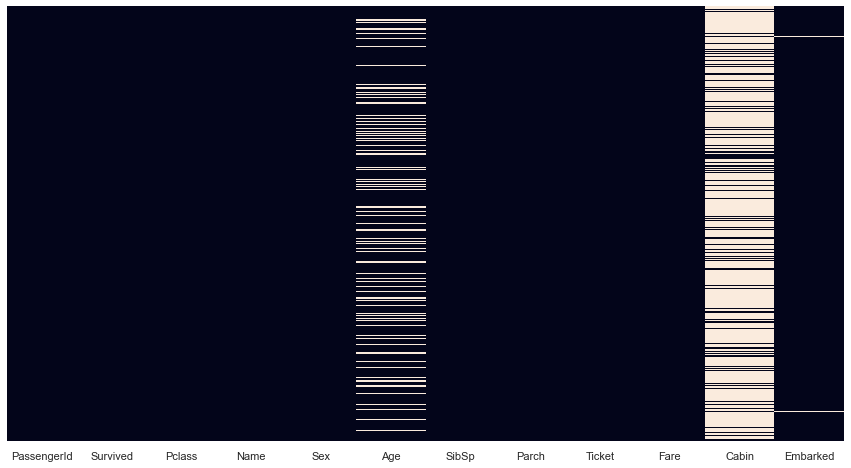

In [154]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False)

In [160]:
train_data = titanic_train.copy()

since there are many missing values from cabin , it is better to drop it

In [161]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [162]:
train_data.drop('Cabin',axis=1,inplace=True)

In [165]:
train_data['Age'] = train_data[['Age','Pclass','Sex']].apply(impute_age,axis=1)

In [178]:
train_data['Embarked'].isnull().sum()

2

In [180]:
train_data.dropna(inplace=True)

In [181]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Heatmap after fixing missing values 

<AxesSubplot:>

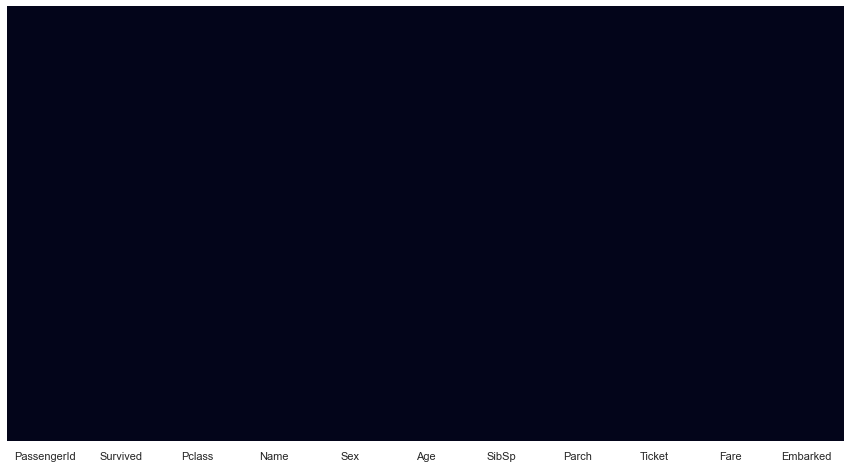

In [182]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

# EDA - Train dataset 

In [209]:
train_data.groupby('Survived')['Sex'].value_counts().

Survived  Sex   
0         male      468
          female     81
1         female    231
          male      109
Name: Sex, dtype: int64

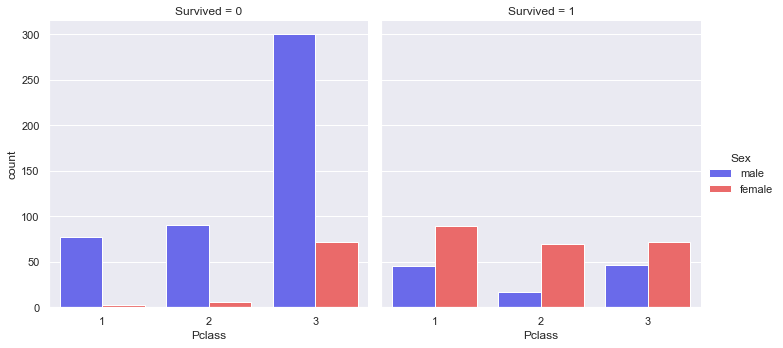

In [189]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=train_data, kind="count",palette='seismic')


For Not Survived : More Males than females

For Survived : More Female than males

<AxesSubplot:xlabel='Age', ylabel='Count'>

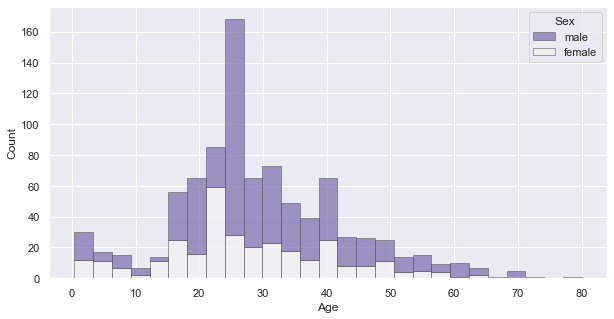

In [215]:
sns.histplot(
    train_data,
    x="Age", hue="Sex",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)


Passengers who were travelling mostly their age was between 20 to 40

In [293]:
a = train_data.groupby('SibSp')['Survived'].value_counts()
total = train_data['SibSp'].value_counts()

In [294]:
SibSp_total = pd.crosstab(train_data['SibSp'],train_data['Survived']).join(total,on='SibSp',how='inner').rename(columns={0:'Not Survived',1:'Survived','SibSp':'Total'})

In [308]:
SibSp_total['Not Survived percent']= round(SibSp_total['Not Survived']/SibSp_total['Total'],2)
SibSp_total['Survived percent']= round(SibSp_total['Survived']/SibSp_total['Total'],2)

In [309]:
print(SibSp_total)

       Not Survived  Survived  Total  Survived percent  Not Survived percent
SibSp                                                                       
0               398       208    606              0.34                  0.66
1                97       112    209              0.54                  0.46
2                15        13     28              0.46                  0.54
3                12         4     16              0.25                  0.75
4                15         3     18              0.17                  0.83
5                 5         0      5              0.00                  1.00
8                 7         0      7              0.00                  1.00


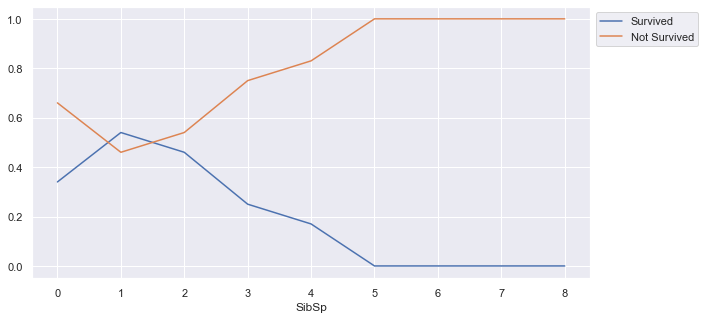

In [316]:
SibSp_total['Survived percent'].plot()
SibSp_total['Not Survived percent'].plot()
plt.legend(['Survived', 'Not Survived'], bbox_to_anchor=(1,1))

### Observation : only Passenger with 1 Sibling/Spouse  has More Survival rate than not survival rate 

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

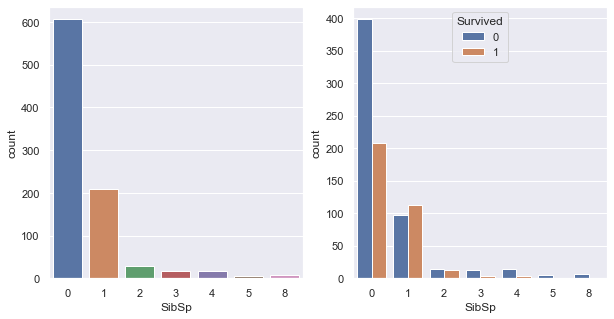

In [251]:
plt.subplot(1,2,2)
sns.countplot('SibSp',data=train_data,hue='Survived')
plt.subplot(1,2,1)
sns.countplot('SibSp',data=train_data)

#### Most of the passenger boarded were single or had a spouse or sibling 

#### Passengers who survived were mostly single or had one spouse or siblings

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

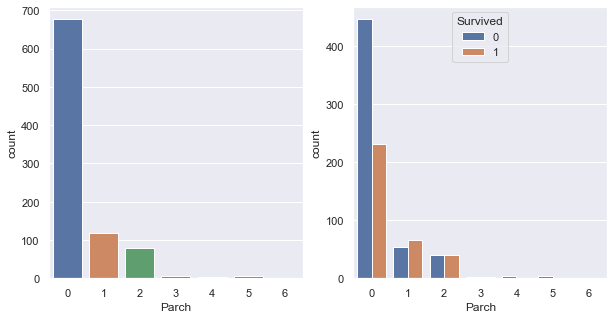

In [317]:
plt.subplot(1,2,2)
sns.countplot('Parch',data=train_data,hue='Survived')
plt.subplot(1,2,1)
sns.countplot('Parch',data=train_data)

Prefernce were given to the parents or parents with childen compared to bachelor

### Importing Test data

In [480]:
titanic_test = pd.read_csv("titanic_test.csv")

In [481]:
titanic_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [482]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

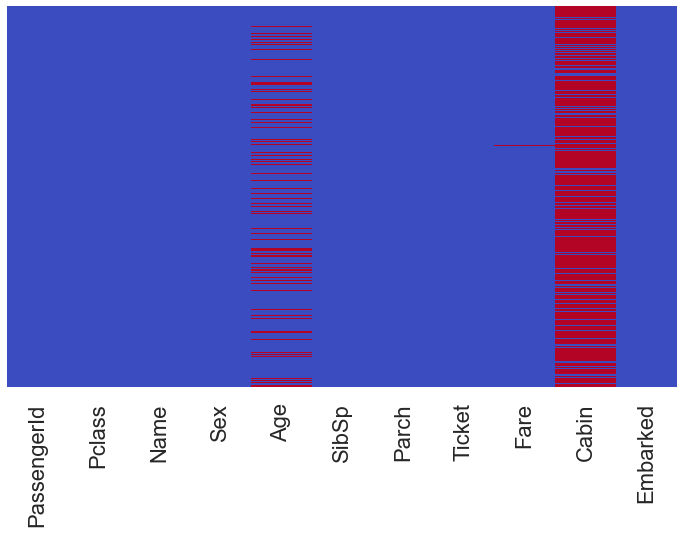

In [483]:
plt.figure(figsize=(12,7))
sns.set_context('poster')
sns.heatmap(titanic_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [127]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Treating missing values from fare , Cabin and Age 

In [484]:
titanic_test['Fare'].fillna(titanic['Fare'].mean(),inplace=True)

since there was only one missing value, it wa replaced with the mean of the fare variable

In [485]:
round(titanic_test.groupby(by=['Pclass','Sex'],axis=0)['Age'].mean(),0)

Pclass  Sex   
1       female    41.0
        male      41.0
2       female    24.0
        male      31.0
3       female    23.0
        male      25.0
Name: Age, dtype: float64

In [486]:
def impute_age(col):
    Age=col[0]
    Pclass=col[1]
    Sex=col[2]
    if pd.isnull(Age):
        if Pclass==1:
            if Sex=='male':
                return 41
            else:
                return 40
        elif Pclass==2:
            if Sex=='male':
                return 31
            else:
                return 24
        else:
            if Sex=='male':
                return 25
            else:
                return 23
    else:
        return Age            

In [487]:
titanic_test['Age'] = titanic[['Age','Pclass','Sex']].apply(impute_age,axis=1)

the missing value of age is replaced with mean age of Pclass gender wise 

In [488]:
titanic_test.drop('Cabin',axis=1,inplace=True)

Since there were too many missing data from Cabin it was dropped from the dataset 

<AxesSubplot:>

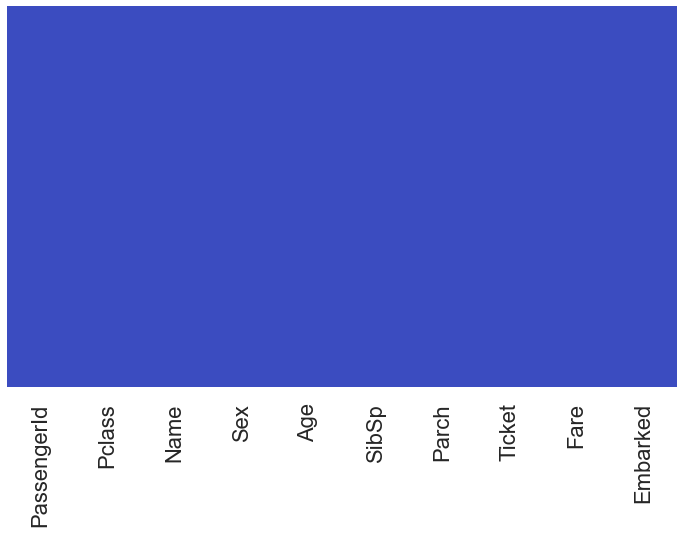

In [489]:
plt.figure(figsize=(12,7))
sns.set_context('poster')
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

###  target acheived : NO Missing value in the train , test  dataset and EDA ḍone 

### Data Preprocessing 

In [709]:
train = train_data.copy()
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [710]:
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [711]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


<AxesSubplot:>

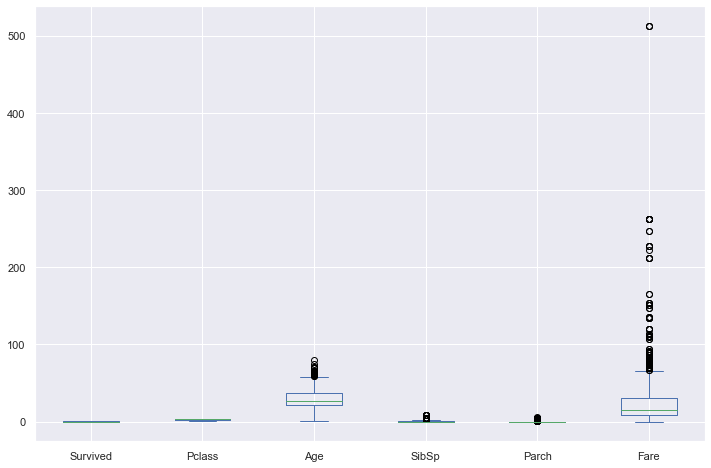

In [341]:
train.plot.box(figsize=(12,8))

<AxesSubplot:>

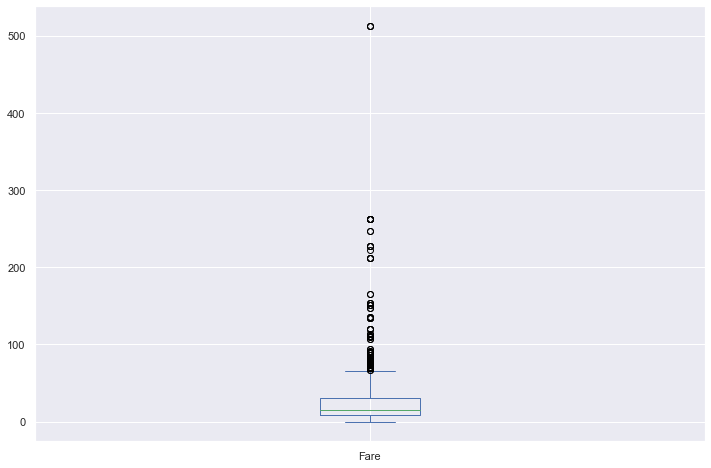

In [342]:
train['Fare'].plot.box(figsize=(12,8))

In [712]:
print(train['Pclass'].value_counts())
train.groupby('Pclass')['Fare'].max()

3    491
1    214
2    184
Name: Pclass, dtype: int64


Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [713]:
train[['Fare','Age']].describe()

,Fare,Age
count,889.000000,889.000000
mean,32.096681,29.211665
std,49.697504,13.288669
min,0.000000,0.420000
25%,7.895800,22.000000
50%,14.454200,26.000000
75%,31.000000,36.500000
max,512.329200,80.000000


In [714]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [717]:
# dummy variable for Sex , Embarked
train['Sex'] = pd.get_dummies(train['Sex'],drop_first=True)

In [724]:
train[['Embarked_Q','Embarked_S']] = pd.get_dummies(train['Embarked'],drop_first=True)

In [729]:
train = train.reindex(sorted(train.columns), axis=1)

In [730]:
train.drop('Embarked',axis=1,inplace=True)

In [743]:
train.head(2)

,Age,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,0,1,7.2500,0,3,1,1,0
1,38.0,0,0,71.2833,0,1,0,1,1


### Titanic Test 

In [736]:
test=titanic_test.copy()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S


In [737]:
test.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [747]:
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,1,0


In [739]:
test[['Embarked_Q','Embarked_S']] = pd.get_dummies(test['Embarked'],drop_first=True)

In [742]:
test['Sex'] = pd.get_dummies(test['Sex'],drop_first=True)

In [746]:
test.drop('Embarked',axis=1,inplace=True)

In [751]:
train['Embarked_Q']=train['Embarked_Q'].astype('float64')
train['Embarked_S']=train['Embarked_S'].astype('float64')
train['Sex']=train['Sex'].astype('float64')

In [750]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         889 non-null    float64
 1   Embarked_Q  889 non-null    float64
 2   Embarked_S  889 non-null    float64
 3   Fare        889 non-null    float64
 4   Parch       889 non-null    int64  
 5   Pclass      889 non-null    int64  
 6   Sex         889 non-null    float64
 7   SibSp       889 non-null    int64  
 8   Survived    889 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 101.7 KB


In [770]:
test['Embarked_Q']=test['Embarked_Q'].astype('int64')
test['Embarked_S']=test['Embarked_S'].astype('int64')
test['Sex']=test['Sex'].astype('int64')

In [776]:
test = test.reindex(sorted(test.columns), axis=1)

In [779]:
test.drop('Survived',axis = 1 ,inplace=True)

In [780]:
test.head(3)

,Age,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex,SibSp
0,34.5,1,0,7.8292,0,3,1,0
1,47.0,0,1,7.0000,0,3,0,1
2,62.0,1,0,9.6875,0,2,1,0


## Modelling

In [759]:
X=train.iloc[:,:-1]
print(X.head(4))
y= train['Survived']
print(y.head(4))

    Age  Embarked_Q  Embarked_S     Fare  Parch  Pclass  Sex  SibSp
0  22.0         0.0         1.0   7.2500      0       3  1.0      1
1  38.0         0.0         0.0  71.2833      0       1  0.0      1
2  26.0         0.0         1.0   7.9250      0       3  0.0      0
3  35.0         0.0         1.0  53.1000      0       1  0.0      1
0    0
1    1
2    1
3    1
Name: Survived, dtype: int64


In [760]:
from sklearn.model_selection import train_test_split

In [761]:
split_ = train_test_split

In [762]:
x_train,x_test,y_train,y_test = split_(X,y,test_size=0.3,random_state=101)

In [658]:
print("x_train\n",x_train.shape)
print("x_test\n",x_test.shape)
print("y_train\n",y_train.shape)
print("y_test\n",x_test.shape)

x_train
 (622, 8)
x_test
 (267, 8)
y_train
 (622,)
y_test
 (267, 8)


In [763]:
from sklearn.linear_model import LogisticRegression

In [764]:
logmodel = LogisticRegression()

In [765]:
pred_test = logmodel.fit(x_train,y_train)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [766]:
predict_ = logmodel.predict(x_test)

In [767]:
from sklearn.metrics import classification_report,confusion_matrix

In [664]:
cr = classification_report

In [665]:
cm = confusion_matrix

In [768]:
print(cr(y_test,predict_))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [781]:
pred_test = logmodel.predict(test)

In [782]:
print("The shape of pred_test\t",pred_test.shape,"\n")
print("The shape of PassengerID",titanic_test['PassengerId'].shape,"\n")


The shape of pred_test	 (418,) 

The shape of PassengerID (418,) 



In [783]:
pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [671]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [784]:
dataset_final= pd.DataFrame(data =titanic_test['PassengerId']).join(pd.DataFrame(pred_test))

In [785]:
dataset_final.head(10)

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [791]:
dataset_final.columns

Index(['PassengerId', 0], dtype='object')

In [792]:
dataset_final.rename(columns={0:'Survived'})
print(dataset_final)

     PassengerId  0
0            892  0
1            893  0
2            894  0
3            895  0
4            896  1
..           ... ..
413         1305  0
414         1306  1
415         1307  0
416         1308  0
417         1309  0

[418 rows x 2 columns]


In [793]:
final_file = dataset_final.to_csv("Titanic_by_koshal.csv",index=False) 

In [794]:
final_file

## Modelling 2 - Random Forest 

In [700]:
from sklearn.ensemble import RandomForestClassifier

In [795]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

#%%time
classifier_rf.fit(X, y)

# checking the oob score
print('checking the oob score',classifier_rf.oob_score_)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X, y)

print('Best Score',grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

checking the oob score 0.8278965129358831
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.8290459742253464
RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)


In [796]:
classificer_rf2 = RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [797]:
classificer_rf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [798]:
predict_test = classificer_rf2.predict(x_test)

In [800]:
print(cr(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       163
           1       0.82      0.53      0.64       104

    accuracy                           0.77       267
   macro avg       0.79      0.73      0.74       267
weighted avg       0.78      0.77      0.76       267



In [801]:
predict_test2=classificer_rf2.predict(test)

In [802]:
dataset_final= pd.DataFrame(data =titanic_test['PassengerId']).join(pd.DataFrame(predict_test2))

In [805]:
dataset_final.head(2)

,PassengerId,0
0,892,0
1,893,0


In [807]:
dataset_final=dataset_final.rename(columns={0:'Survived'})
print(dataset_final)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [808]:
final_file = dataset_final.to_csv("RandomForest_Titanic_by_koshal.csv",index=False) 